# Task 3: Correlation between News and Stock Movement


## 1. Import Necessary Libraries


In [23]:
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from nltk.sentiment import SentimentIntensityAnalyzer
from scipy.stats import pearsonr
import matplotlib.pyplot as plt


## 2. Load Data


# Load the news data


In [2]:
news_df = pd.read_csv('../data/raw_analyst_ratings.csv')


# Load stock data


In [3]:
stock_dfs = {
    'NVDA': pd.read_csv('../data/NVDA_historical_data.csv'),
    'AAPL': pd.read_csv('../data/AAPL_historical_data.csv'),
    'AMZN': pd.read_csv('../data/AMZN_historical_data.csv'),
    'GOOG': pd.read_csv('../data/GOOG_historical_data.csv'),
    'META': pd.read_csv('../data/META_historical_data.csv'),
    'MSFT': pd.read_csv('../data/MSFT_historical_data.csv'),
    'TSLA': pd.read_csv('../data/TSLA_historical_data.csv')
}

## 3. Data Preparation


# Convert date columns to datetime


In [42]:
news_df['date'] = pd.to_datetime(news_df['date']).dt.tz_localize(None)  # Remove timezone info
for stock in stock_dfs:
    stock_dfs[stock]['Date'] = pd.to_datetime(stock_dfs[stock]['Date']).dt.tz_localize(None)  # Remove timezone info


# Normalize Dates: Align dates in both news and stock datasets


In [40]:
news_df['date'] = news_df['date'].dt.normalize()


## 4. Sentiment Analysis on News Headlines


In [11]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

news_df['sentiment'] = news_df['headline'].apply(get_sentiment)

## 5. Calculate Stock Movements


In [12]:
for stock, df in stock_dfs.items():
    df['Daily_Return'] = df['Close'].pct_change()

## 6. Aggregate Daily Sentiments


In [45]:
daily_sentiment = news_df.groupby('date')['sentiment'].mean().reset_index()


## 7. Correlation Analysis


In [46]:
correlation_results = {}

for stock, df in stock_dfs.items():
    # Merge stock data with sentiment data
    merged_df = pd.merge(df[['Date', 'Daily_Return']], daily_sentiment, left_on='Date', right_on='date', how='inner')
    
    # Drop missing values
    merged_df.dropna(inplace=True)
    
    # Calculate Pearson correlation
    correlation = merged_df['Daily_Return'].corr(merged_df['sentiment'])
    correlation_results[stock] = correlation

 ## 8 Visualization
 

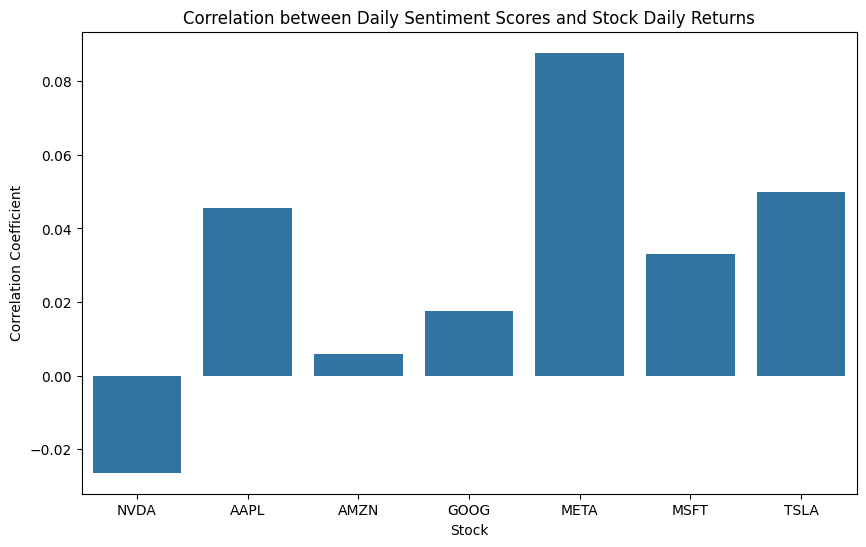

In [47]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(correlation_results.keys()), y=list(correlation_results.values()))
plt.title('Correlation between Daily Sentiment Scores and Stock Daily Returns')
plt.xlabel('Stock')
plt.ylabel('Correlation Coefficient')
plt.show()

## 9. Conclusion


In [48]:
for stock, correlation in correlation_results.items():
    print(f'{stock}: {correlation:.4f}')

NVDA: -0.0264
AAPL: 0.0455
AMZN: 0.0059
GOOG: 0.0174
META: 0.0877
MSFT: 0.0329
TSLA: 0.0500
